<a href="https://colab.research.google.com/github/AKSHAY-058/AKSHAY-RAJ/blob/master/CI_MINOR_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CI MINOR PROJECT

PRECTION OF STOCK OF SUPERMARKET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


About our dataset :

We have in our training data :- 
1. date - every date of items sold
2. date_block_num - this number given to every month
3. shop_id - unique number of every shop
4. item_id - unique number of every item
5. item_price - price of every item
6. item_cnt_day - number of items sold on a particular day 

We have in our testing data :- 
1. ID - unique for every (shop_id,item_id) pair.
2. shop_id - unique number of every shop
3. item_id - unique number of every item

we have to predict how many items of a type from each shop  will be sold in a whole next month.


In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [ ]:
#loading data 
# os.listdir('../content')
sales_data = pd.read_csv('/content/drive/MyDrive/CI-PROJECT/CI-PRO/sales_train.csv')
item_cat = pd.read_csv('/content/drive/MyDrive/CI-PROJECT/CI-PRO/item_categories.csv')
items = pd.read_csv('/content/drive/MyDrive/CI-PROJECT/CI-PRO/items.csv')
shops = pd.read_csv('/content/drive/MyDrive/CI-PROJECT/CI-PRO/shops.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/CI-PROJECT/CI-PRO/sample_submission.csv')
test_data = pd.read_csv('/content/drive/MyDrive/CI-PROJECT/CI-PRO/test.csv')

In [ ]:
sales_data.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0


In [ ]:
test_data.head(3)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233


In [ ]:
sample_submission.head(3)

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5


In [ ]:
def basic_eda(df):
    print("----------TOP 5 RECORDS--------")
    print(df.head(5))
    print("----------INFO-----------------")
    print(df.info())
    print("----------Describe-------------")
    print(df.describe())
    print("----------Columns--------------")
    print(df.columns)
    print("----------Data Types-----------")
    print(df.dtypes)
    print("-------Missing Values----------")
    print(df.isnull().sum())
    print("-------NULL values-------------")
    print(df.isna().sum())
    print("-----Shape Of Data-------------")
    print(df.shape)
    
    

In [ ]:
print("=============================Sales Data=============================")
basic_eda(sales_data)
print("=============================Test data=============================")
basic_eda(test_data)
print("=============================Item Categories=============================")
basic_eda(item_cat)
print("=============================Items=============================")
basic_eda(items)
print("=============================Shops=============================")
basic_eda(shops)
print("=============================Sample Submission=============================")
basic_eda(sample_submission)



=============================Sales Data=============================
----------TOP 5 RECORDS--------
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
----------

In [ ]:
#we can see that 'date' column in sales_data is an object so changing it to standard form to use in indexing, we do
sales_data['date'] = pd.to_datetime(sales_data['date'],format = '%d.%m.%Y')

In [ ]:
sales_data.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
1,2013-01-03,0,25,2552,899.0,1.0
2,2013-01-05,0,25,2552,899.0,-1.0


In [ ]:
#now we will create a pivot tabel by going so we get our data in desired form 
#we want get total count value of an item over the whole month for a shop so we made shop_id and item_id our indices and date_block_num our column the value we want is item_cnt_day and used sum as aggregating function 
dataset = sales_data.pivot_table(index = ['shop_id','item_id'],values = ['item_cnt_day'],columns = ['date_block_num'],fill_value = 0,aggfunc='sum')

In [ ]:
dataset.head(3)

item_cnt_day                        ...                        
date_block_num            0   1  2  3  4  5  6  7   ... 26 27 28 29 30 31 32 33
shop_id item_id                                     ...                        
0       30                 0  31  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0
        31                 0  11  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0
        32                 6  10  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0

[3 rows x 34 columns]

In [ ]:
# lets reset our indices, so that data should be in way we can easily manipulate
dataset.reset_index(inplace = True)

In [ ]:
# lets check on our pivot table
dataset.head(3)

shop_id item_id item_cnt_day               ...                     
date_block_num                            0   1  2  3  4  ... 27 28 29 30 31 32 33
0                    0      30            0  31  0  0  0  ...  0  0  0  0  0  0  0
1                    0      31            0  11  0  0  0  ...  0  0  0  0  0  0  0
2                    0      32            6  10  0  0  0  ...  0  0  0  0  0  0  0

[3 rows x 36 columns]

In [ ]:
# Now we will merge our pivot table with the test_data because we want to keep the data of items we have
# predict
dataset = pd.merge(test_data,dataset,on = ['item_id','shop_id'],how = 'left')

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
dataset.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)","(item_cnt_day, 10)","(item_cnt_day, 11)","(item_cnt_day, 12)","(item_cnt_day, 13)","(item_cnt_day, 14)","(item_cnt_day, 15)","(item_cnt_day, 16)","(item_cnt_day, 17)","(item_cnt_day, 18)","(item_cnt_day, 19)","(item_cnt_day, 20)","(item_cnt_day, 21)","(item_cnt_day, 22)","(item_cnt_day, 23)","(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# lets fill all NaN values with 0
dataset.fillna(0,inplace = True)
# lets check our data now 
dataset.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)","(item_cnt_day, 10)","(item_cnt_day, 11)","(item_cnt_day, 12)","(item_cnt_day, 13)","(item_cnt_day, 14)","(item_cnt_day, 15)","(item_cnt_day, 16)","(item_cnt_day, 17)","(item_cnt_day, 18)","(item_cnt_day, 19)","(item_cnt_day, 20)","(item_cnt_day, 21)","(item_cnt_day, 22)","(item_cnt_day, 23)","(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# we will drop shop_id and item_id because we do not need them
# we are making our model learn how to generate the next sequence 
dataset.drop(['shop_id','item_id','ID'],inplace = True, axis = 1)
dataset.head()

,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)","(item_cnt_day, 10)","(item_cnt_day, 11)","(item_cnt_day, 12)","(item_cnt_day, 13)","(item_cnt_day, 14)","(item_cnt_day, 15)","(item_cnt_day, 16)","(item_cnt_day, 17)","(item_cnt_day, 18)","(item_cnt_day, 19)","(item_cnt_day, 20)","(item_cnt_day, 21)","(item_cnt_day, 22)","(item_cnt_day, 23)","(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Our features will be number of items sold in month from a shop excluding last month data because that will our labels, that we help our model learn to predict next sequence. And for testing will use number of items sold in month from a shop excluding first month like this dimension of our data remains same. Our model will predict the next sequence and that we will be our results.

In [ ]:
# X we will keep all columns execpt the last one 
X_train = np.expand_dims(dataset.values[:,:-1],axis = 2)
# the last column is our label
y_train = dataset.values[:,-1:]

# for test we keep all the columns execpt the first one
X_test = np.expand_dims(dataset.values[:,1:],axis = 2)

# lets have a look on the shape 
print(X_train.shape,y_train.shape,X_test.shape)


(214200, 33, 1) (214200, 1) (214200, 33, 1)


In [ ]:
# importing libraries required for our model
from keras import optimizers
from tensorflow.keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# our defining our model 
model_lstm = Sequential()
model_lstm.add(LSTM(units = 64,input_shape = (X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(1))

model_lstm.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
model_lstm.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lstm = model_lstm.fit(X_train,y_train,batch_size = 4096,epochs = 10)

Epoch 1/10
53/53 [==============================] - 22s 17ms/step - loss: 17.3354 - mean_squared_error: 17.3354
Epoch 2/10
53/53 [==============================] - 1s 16ms/step - loss: 30.6874 - mean_squared_error: 30.6874
Epoch 3/10
53/53 [==============================] - 1s 16ms/step - loss: 21.1445 - mean_squared_error: 21.1445
Epoch 4/10
53/53 [==============================] - 1s 16ms/step - loss: 59.6838 - mean_squared_error: 59.6838
Epoch 5/10
53/53 [==============================] - 1s 16ms/step - loss: 14.1064 - mean_squared_error: 14.1064
Epoch 6/10
53/53 [==============================] - 1s 16ms/step - loss: 22.0270 - mean_squared_error: 22.0270
Epoch 7/10
53/53 [==============================] - 1s 16ms/step - loss: 14.5137 - mean_squared_error: 14.5137
Epoch 8/10
53/53 [==============================] - 1s 16ms/step - loss: 21.4253 - mean_squared_error: 21.4253
Epoch 9/10
53/53 [==============================] - 1s 16ms/step - loss: 22.6094 - mean_squared_error: 22.6094


In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(units = 64,input_shape = (X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(1))

model_lstm.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
model_lstm.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lstm2 = model_lstm.fit(X_train,y_train,batch_size = 4096,epochs = 20)

Epoch 1/20
53/53 [==============================] - 1s 17ms/step - loss: 30.1265 - mean_squared_error: 30.1265
Epoch 2/20
53/53 [==============================] - 1s 16ms/step - loss: 30.0277 - mean_squared_error: 30.0277
Epoch 3/20
53/53 [==============================] - 1s 16ms/step - loss: 29.8432 - mean_squared_error: 29.8432
Epoch 4/20
53/53 [==============================] - 1s 16ms/step - loss: 29.7495 - mean_squared_error: 29.7495
Epoch 5/20
53/53 [==============================] - 1s 16ms/step - loss: 29.7415 - mean_squared_error: 29.7415
Epoch 6/20
53/53 [==============================] - 1s 16ms/step - loss: 29.6743 - mean_squared_error: 29.6743
Epoch 7/20
53/53 [==============================] - 1s 16ms/step - loss: 29.7159 - mean_squared_error: 29.7159
Epoch 8/20
53/53 [==============================] - 1s 16ms/step - loss: 29.6344 - mean_squared_error: 29.6344
Epoch 9/20
53/53 [==============================] - 1s 16ms/step - loss: 29.5282 - mean_squared_error: 29.5282
E

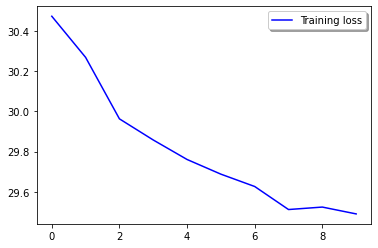

In [ ]:
# Plot the loss curves for training
plt.plot(history_lstm.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [ ]:
#CNN for Time Series Forecasting

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer='adam')
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 32, 64)            192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 16, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                51250     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 51,493
Trainable params: 51,493
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn_history = model_cnn.fit(X_train, y_train, epochs=10, verbose=2)

Epoch 1/10
6694/6694 - 39s - loss: 27.6602
Epoch 2/10
6694/6694 - 11s - loss: 24.9788
Epoch 3/10
6694/6694 - 11s - loss: 37.4241
Epoch 4/10
6694/6694 - 11s - loss: 28.4067
Epoch 5/10
6694/6694 - 11s - loss: 42.9938
Epoch 6/10
6694/6694 - 11s - loss: 22.5023
Epoch 7/10
6694/6694 - 11s - loss: 25.4127
Epoch 8/10
6694/6694 - 11s - loss: 26.5333
Epoch 9/10
6694/6694 - 11s - loss: 27.8694
Epoch 10/10
6694/6694 - 11s - loss: 27.2433


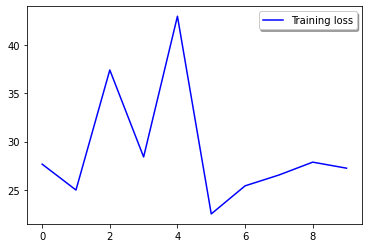

In [ ]:
plt.plot(cnn_history.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer='adam')
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 32, 64)            192       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 16, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                51250     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 51,493
Trainable params: 51,493
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn2_history = model_cnn.fit(X_train, y_train, epochs=20, verbose=2)

Epoch 1/20
6694/6694 - 11s - loss: 25.9548
Epoch 2/20
6694/6694 - 11s - loss: 27.4284
Epoch 3/20
6694/6694 - 11s - loss: 28.9415
Epoch 4/20
6694/6694 - 11s - loss: 26.5466
Epoch 5/20
6694/6694 - 11s - loss: 25.3565
Epoch 6/20
6694/6694 - 11s - loss: 25.1178
Epoch 7/20
6694/6694 - 11s - loss: 29.8874
Epoch 8/20
6694/6694 - 11s - loss: 29.2693
Epoch 9/20
6694/6694 - 11s - loss: 31.9599
Epoch 10/20
6694/6694 - 11s - loss: 25.0317
Epoch 11/20
6694/6694 - 11s - loss: 23.2946
Epoch 12/20
6694/6694 - 11s - loss: 22.0869
Epoch 13/20
6694/6694 - 11s - loss: 27.6398
Epoch 14/20
6694/6694 - 11s - loss: 23.3640
Epoch 15/20
6694/6694 - 11s - loss: 26.9440
Epoch 16/20
6694/6694 - 11s - loss: 22.6016
Epoch 17/20
6694/6694 - 11s - loss: 24.6565
Epoch 18/20
6694/6694 - 11s - loss: 23.9510
Epoch 19/20
6694/6694 - 11s - loss: 22.7889
Epoch 20/20
6694/6694 - 11s - loss: 21.2094


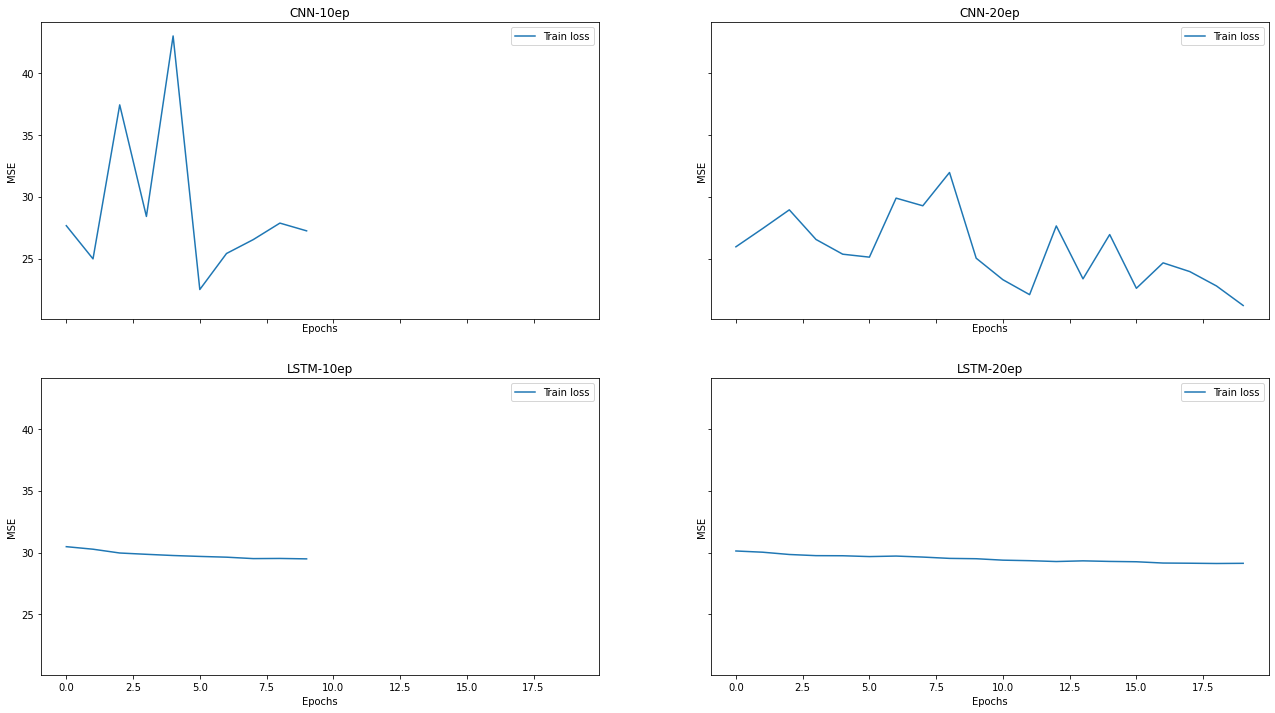

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(22,12))
ax1, ax2 = axes[0]
ax3, ax4 = axes[1]

ax1.plot(cnn_history.history['loss'], label='Train loss')
ax1.legend(loc='best')
ax1.set_title('CNN-10ep')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE')

ax2.plot(cnn2_history.history['loss'], label='Train loss')
ax2.legend(loc='best')
ax2.set_title('CNN-20ep')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MSE')

ax3.plot(history_lstm.history['loss'], label='Train loss')
ax3.legend(loc='best')
ax3.set_title('LSTM-10ep')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('MSE')

ax4.plot(history_lstm2.history['loss'], label='Train loss')
ax4.legend(loc='best')
ax4.set_title('LSTM-20ep')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('MSE')

plt.show()